# 프로젝트 : 나랑 닮은 연예인을 찾아보자.

### Step1. 사진 모으기

### Step2. 얼굴 영역 자르기

### 임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.

[(36, 201, 222, 15)]


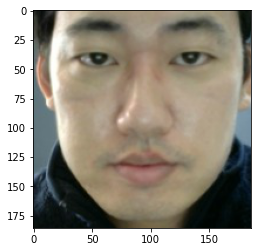

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images2/zoo.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [2]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
      
    return cropped_face

In [3]:
# import face_recognition
# import os

# def get_gropped_face(image_file):
#     image = face_recognition.load_image_file(image_file)
#     face_locations = face_recognition.face_locations(image)
#     a, b, c, d = face_locations[0]
#     face = get_cropped_face(img_path)
#     if len(face) == 0: continue # 얼굴 인식 실패시 embedding_dict에 추가하지 않음
#     cropped_face = image[a:c,d:b,:]
      
#     return cropped_face

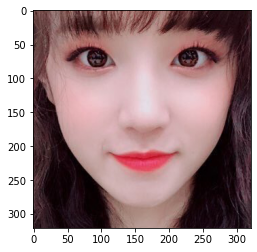

In [4]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images2/우기.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [5]:
#우기를 이번노드를 통해서 처음 알게되었는데 이쁘네요... 감사합니다 이런 아이를 알게해주셔서...

### Step3. 얼굴 영역의 임베딩 추출하기

이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [6]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list)) #디렉토리에 있는 파일들 읽기

file_list: ['정우성.jpeg', '이효리.jpg', '벤 에플렉.jpeg', '서장훈.jpg', '봉준호.jpg', '정수빈.jpg', '레드벨벳웬디.jpg', '이근대위.jpeg', '이종혁.jpeg', '배성우.png', '윤경신.jpg', '노홍철', '옥냥이.jpeg', '로제.jpg', '배성재.jpg', '장원영.jpeg', '숀 코네리.jpg', '리사.jpg', '노무현.jpeg', '김종서.jpg', '한석규.jpg', '효정.jpg', '옥냥이', '효정', '클린트 이스트우드.jpg', '채연.jpg', '러블리즈예인.jpg', '진.jpg', '제니', '온앤오프와이엇.jpg', '송중기.jpeg', '박해일.jpeg', '김학범.jpg', '오재원.jpg', '씨잼.jpg', '씨잼', '피어스 브로스넌.jpg', '제니.jpg', '지수.jpg', '제프리 힌턴.jpg', '손호준.jpeg', '벤 에플렉', '크리스 에반스.jpg', '민니.jpg', '크리스 햄스워스.jpg', '트와이스쯔위.jpg', '노홍철.jpeg', '카이.jpg', '나인뮤지스경리.jpg', '최준석.jpg', '승희.jpeg', '고창석.jpeg', '김경진', '리아.jpg', '김경진.png', '최준석', '아이즈원민주.jpg', '이종혁', '유해진.jpg', '스윙스.jpeg', '이승철.jpeg', '강미나.jpg', '손예진.jpeg', '박서준.jpeg', '트와이스사나.jpg', '이근대위', '강민경.jpg', '정국.jpg', '이천수.jpg', '켄 정.jpeg', '이재용.jpg', '택연.jpg', '세훈.jpg', '아이즈원김채원.jpg', '백윤식.png', '드웨인 존슨.jpg', '트와이스모모.jpeg', '장원준.jpeg', '박찬욱.jpeg', '잇지유나.jpg', '김윤석.jpeg', '전소미.jpg', '김래원.jpeg', '이희준.jpg', '박찬호.jpg', '지호.jpg', '지수', '정준하.jpg

In [7]:
image_file = os.path.join(dir_path, '우기.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.07744546,  0.05722147,  0.00913411, -0.09517772, -0.13188207,
        -0.05949695, -0.09195058, -0.03244811,  0.13176756, -0.07606974,
         0.15282731, -0.12783018, -0.232162  , -0.00521253, -0.09851214,
         0.24820359, -0.14558397, -0.12519537, -0.02343721,  0.0142489 ,
         0.09801706,  0.08389489, -0.01947479,  0.05901034, -0.13987494,
        -0.29371837, -0.07217014, -0.03968604, -0.08312335, -0.08330574,
         0.01555113,  0.10943143, -0.1569788 ,  0.02460154,  0.06017528,
         0.0823668 ,  0.00992189, -0.06487438,  0.16284075,  0.05162474,
        -0.33624181,  0.07261073,  0.08510629,  0.25780502,  0.1626814 ,
         0.00336319,  0.01610224, -0.1673215 ,  0.09093204, -0.19274141,
         0.00072129,  0.14474098,  0.01736838,  0.00553567,  0.01023235,
        -0.12057345,  0.0515597 ,  0.11554511, -0.16563195, -0.02960234,
         0.11985929, -0.02500054, -0.01060403, -0.12880981,  0.1941068 ,
         0.02435453, -0.14555681, -0.20437475,  0.0

In [46]:
from PIL import Image
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/images2/' #경로
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    #path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/images2/' #경로
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        pillow_image = Image.fromarray(face)  
        pillow_image.save(path_to_save + os.path.splitext(file)[0], format = 'jpeg')  
    return embedding_dict

In [9]:
# def get_face_embedding_dict(dir_path):
#     file_list = os.listdir(dir_path)
#     embedding_dict = {}
#     a = 0
#     for file in file_list:
#         image_file = os.path.join(dir_path,file)
#         print(file)
#         face = get_gropped_face(image_file)
#         embedimg = Image.fromarray(face)
#         embedimg.save(path_to_save + os.path.splitext(file)[0], format = 'jpeg' )
#         embedding = get_face_embedding(face)
#         if len(embedding) != 0:
#             embedding_dict[os.path.splitext(file)[0]] = embedding[0]
#         a += 1
#         # print(file)
#         print(a)
#         # if len(embedding) != 0:
#         #     embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
#     return embedding_dict

In [10]:
  embedding_dict = get_face_embedding_dict(dir_path)
# embedding_dict['문재인']

### Step4. 모은 연예인들과 비교하기

모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능합니다.

In [11]:
 import numpy as np

# x = np.array([1,2,3,4,5])
# y = np.array([2,3,4,5,6])

# # print(np.linalg.norm(y-x, ord=1))  #L1 distance
# print(np.linalg.norm(y-x, ord=2))  #L2 distance

In [12]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('zoo', '우기')

0.5355929707551884

In [13]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('우기')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [14]:
# sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

In [15]:
embedding_dict['우기']

array([-0.07744546,  0.05722147,  0.00913411, -0.09517772, -0.13188207,
       -0.05949695, -0.09195058, -0.03244811,  0.13176756, -0.07606974,
        0.15282731, -0.12783018, -0.232162  , -0.00521253, -0.09851214,
        0.24820359, -0.14558397, -0.12519537, -0.02343721,  0.0142489 ,
        0.09801706,  0.08389489, -0.01947479,  0.05901034, -0.13987494,
       -0.29371837, -0.07217014, -0.03968604, -0.08312335, -0.08330574,
        0.01555113,  0.10943143, -0.1569788 ,  0.02460154,  0.06017528,
        0.0823668 ,  0.00992189, -0.06487438,  0.16284075,  0.05162474,
       -0.33624181,  0.07261073,  0.08510629,  0.25780502,  0.1626814 ,
        0.00336319,  0.01610224, -0.1673215 ,  0.09093204, -0.19274141,
        0.00072129,  0.14474098,  0.01736838,  0.00553567,  0.01023235,
       -0.12057345,  0.0515597 ,  0.11554511, -0.16563195, -0.02960234,
        0.11985929, -0.02500054, -0.01060403, -0.12880981,  0.1941068 ,
        0.02435453, -0.14555681, -0.20437475,  0.09000203, -0.18

In [52]:
from PIL import Image
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
        
            img = Image.open(path_to_save + sorted_faces[i][0] )
            plt.imshow(img)
            plt.axis("off")
            plt.show()

In [53]:
# img_logo_array = np.array(img_logo_bmp)

# plt.imshow(img_logo_array)
# plt.axis("off")
# plt.show()
# 이미지 처리 노드를 보면서 코드를 따와서 힌트를 얻고 해결하였다.

In [54]:
##    시각화 할때 힌트
##face = get_gropped_face(image_path)
##pillow_image = Image.fromarray(face)
##pillow_image.save(path_to_save)

순위 1 : 이름(안재홍), 거리(0.3655919951517735)


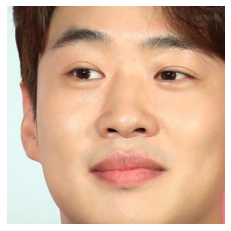

순위 2 : 이름(이승철), 거리(0.38345555666525183)


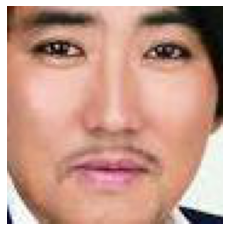

순위 3 : 이름(이영하), 거리(0.3957128868879916)


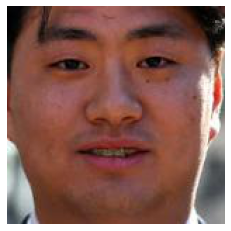

순위 4 : 이름(개리), 거리(0.4074293947161187)


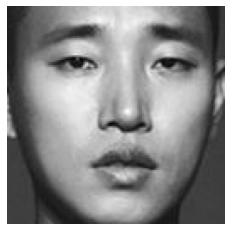

순위 5 : 이름(김경진), 거리(0.41468646644871093)


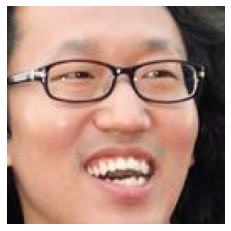

In [55]:
# zoo와 가장 닮은 사람은 누굴까요?
get_nearest_face('zoo')

### Step5. 다양한 재미있는 시각화 시도해 보기

In [19]:
#와.... 얼굴 보는게 너무 힘들었다.

비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎